In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

from sklearn.model_selection import train_test_split
from bart_playground import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

X = X.values.astype(float)
y = np.array(y).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
multi_proposal_probs = {"multi_grow": 0.25, "multi_prune": 0.25, "multi_change": 0.4, "multi_swap": 0.1}
default_proposal_probs = {"grow": 0.25, "prune": 0.25, "change": 0.4, "swap": 0.1}

In [4]:
bart_mtmh = MultiBART(ndpost=2000, nskip=0, n_trees=100, 
                      proposal_probs=multi_proposal_probs, multi_tries=10)
bart_mtmh.fit(X_train, y_train)
sigmas_mtmh = [trace.global_params['eps_sigma2'] for trace in bart_mtmh.trace]

Iterations: 100%|██████████| 2000/2000 [11:52<00:00,  2.81it/s]


In [5]:
bart_default = DefaultBART(ndpost=2000, nskip=0, n_trees=100, 
                           proposal_probs=default_proposal_probs)
bart_default.fit(X_train, y_train)
sigmas_default = [trace.global_params['eps_sigma2'] for trace in bart_default.trace]

Iterations: 100%|██████████| 2000/2000 [01:14<00:00, 26.77it/s]


In [6]:
pipeline_bart = PipelineBART(ndpost=1000, nskip=0, n_trees=100, 
                             multi_proposal_probs=multi_proposal_probs,
                             proposal_probs=default_proposal_probs,
                             multi_tries=10)
pipeline_bart.fit(X_train, y_train, multi_iter=1000)

Running MultiSampler for 1000 iterations...


Iterations: 100%|██████████| 1000/1000 [06:59<00:00,  2.39it/s]


Running DefaultSampler for 1000 iterations...


Iterations: 100%|██████████| 1000/1000 [00:44<00:00, 22.43it/s]


In [7]:
sigmas_pipeline = [trace.global_params['eps_sigma2'] for trace in pipeline_bart.trace]

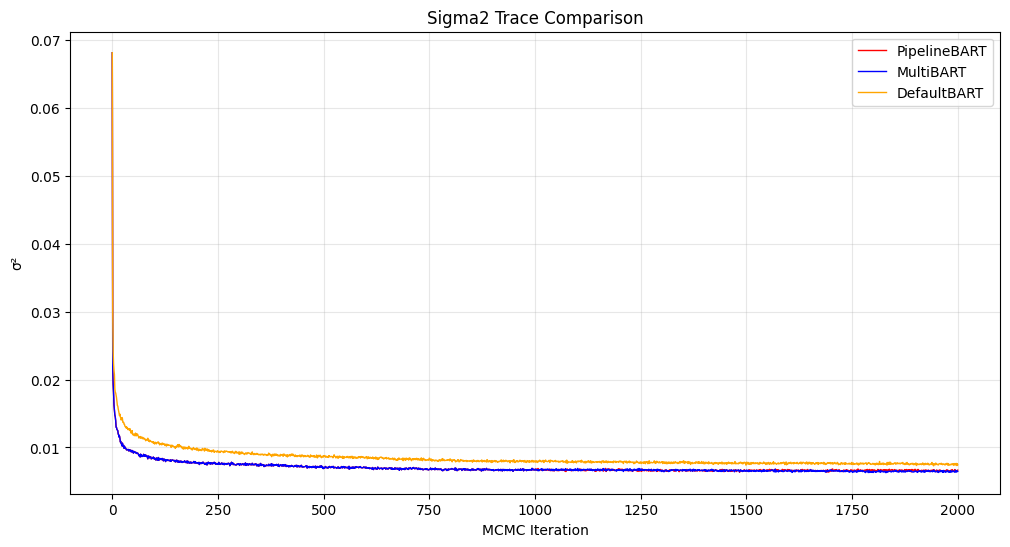

In [8]:
plt.figure(figsize=(12, 6))

# Plot sigmas for PipelineBART
plt.plot(sigmas_pipeline, color='red', linewidth=1, label='PipelineBART')

# Plot sigmas for MultiBART
plt.plot(sigmas_mtmh, color='blue', linewidth=1, label='MultiBART')

# Plot sigmas for DefaultBART
plt.plot(sigmas_default, color='orange', linewidth=1, label='DefaultBART')

# Add labels, title, and legend
plt.xlabel('MCMC Iteration')
plt.ylabel('σ²')
plt.title('Sigma2 Trace Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

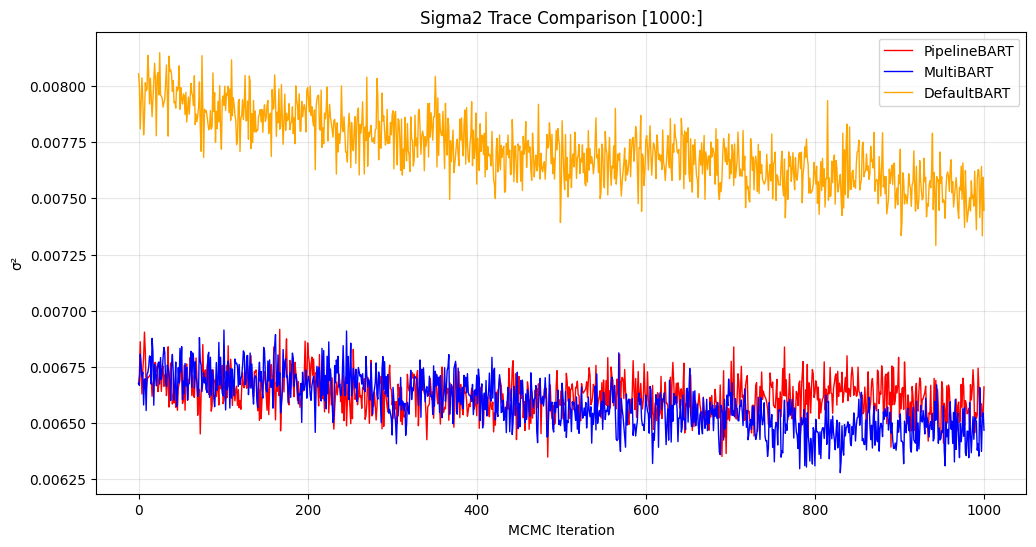

In [9]:
plt.figure(figsize=(12, 6))

# Plot sigmas for PipelineBART
plt.plot(sigmas_pipeline[1000:], color='red', linewidth=1, label='PipelineBART')

# Plot sigmas for MultiBART
plt.plot(sigmas_mtmh[1000:], color='blue', linewidth=1, label='MultiBART')

# Plot sigmas for DefaultBART
plt.plot(sigmas_default[1000:], color='orange', linewidth=1, label='DefaultBART')

# Add labels, title, and legend
plt.xlabel('MCMC Iteration')
plt.ylabel('σ²')
plt.title('Sigma2 Trace Comparison [1000:]')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()